In [1]:
library("ggplot2")
library("dplyr")
library("tidyverse")
library(stringr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  3.0.4     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
title_basics=read.delim('./../dataset/filtered.title.basics.tsv',header=TRUE)

In [52]:
nrow(title_basics)

[1] 1443759

In [53]:
head(title_basics)
tail(title_basics)

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1443754,tt9916724,short,Hay Que Ser Paciente,Hay Que Ser Paciente,0,2015,\N,3,"Documentary,Short"
1443755,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N
1443756,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,\N,49,Documentary
1443757,tt9916756,short,Pretty Pretty Black Girl,Pretty Pretty Black Girl,0,2019,\N,\N,Short
1443758,tt9916764,short,38,38,0,2018,\N,\N,Short
1443759,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [54]:
tb_clean = title_basics #Changes will take place in the tb_clean variable

## primaryTitle and originalTitle

In [55]:
#tb_clean$primaryTitle = NULL
tb_clean$originalTitle = NULL
#Accordind to MJ, "both of these features don't add relevant and usable information 
#(analyse of strings is very high computatinal cost)"

## isAdult

In [56]:
tb_clean$isAdult = as.factor(tb_clean$isAdult) #Don't know why I did this... isAdult is an int

In [57]:
nrow(tb_clean[tb_clean$isAdult==1,])/nrow(tb_clean) #Percentage of adult movies

[1] 0.007147315

## startYear

In [58]:
nrow(tb_clean[tb_clean$startYear=="\\N",])/nrow(tb_clean)

[1] 0.06107598

In [59]:
# remove NA
tb_clean = tb_clean[tb_clean$startYear!="\\N",]
tb_clean$startYear = factor(tb_clean$startYear)

In [60]:
# convert to numeric type
tb_clean$startYear = as.numeric(as.character(tb_clean$startYear))

In [61]:
tb_clean = tb_clean[tb_clean$startYear<2020,] #This is ridiculous

In [62]:
nrow(tb_clean)

[1] 1307365

## endYear

In [63]:
tb_clean$endYear = NULL #End Years are just for Series

## runtimeMinutes

In [66]:
#convert to numeric
tb_clean$runtimeMinutes = as.numeric(as.character(tb_clean$runtimeMinutes))
#check for NAs
sum(is.na(tb_clean$runtimeMinutes))/nrow(tb_clean)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

[1] 0.3168243

In [67]:
class(tb_clean$runtimeMinutes)

[1] "numeric"

In [68]:
#remove NAs the correct way... 
tb_clean$runtimeMinutes[is.na(tb_clean$runtimeMinutes)] = -1

In [69]:
sum(is.na(tb_clean$runtimeMinutes))/nrow(tb_clean)

[1] 0

In [73]:
tail(tb_clean)

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
1443754,tt9916724,short,Hay Que Ser Paciente,0,2015,3,"Documentary,Short"
1443755,tt9916730,movie,6 Gunn,0,2017,116,\N
1443756,tt9916754,movie,Chico Albuquerque - Revelações,0,2013,49,Documentary
1443757,tt9916756,short,Pretty Pretty Black Girl,0,2019,-1,Short
1443758,tt9916764,short,38,0,2018,-1,Short
1443759,tt9916856,short,The Wind,0,2015,27,Short


## genres

In [74]:
nrow(tb_clean[tb_clean$genres=="\\N",])/nrow(tb_clean)

[1] 0.05813908

In [75]:
# removing \N
tb_clean = tb_clean[tb_clean$genres!="\\N",]
tb_clean$genres = factor(tb_clean$genres)

In [76]:
nrow(tb_clean)

[1] 1231356

## Creating columns for the genres

In [77]:
nrow(tb_clean[tb_clean$genres=='\\N',]) #As expected there are no rows with \N in the genres

[1] 0

In [78]:
genres= str_split(tb_clean$genres,',')

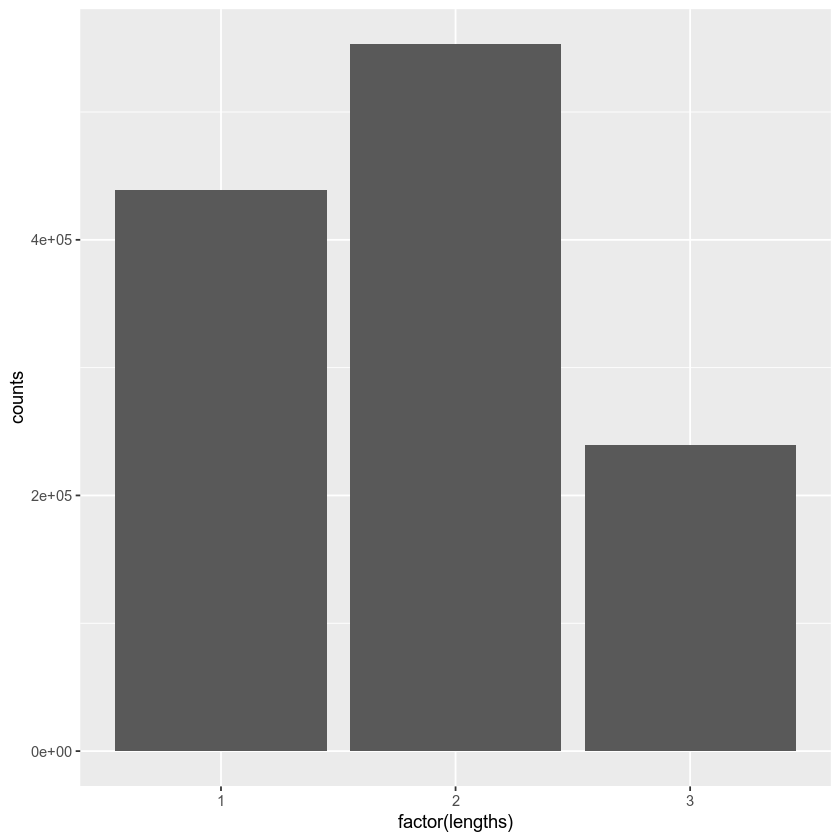

In [79]:
count_1 = length(which(lengths(genres) == 1))
count_2 = length(which(lengths(genres) == 2))
count_3 = length(which(lengths(genres) == 3))
lengths = c(1,2,3)
counts=c(count_1,count_2,count_3)
genres_counts = data.frame(lengths,counts)
ggplot(genres_counts,aes(x=factor(lengths),y=counts))+geom_bar(stat="identity")

In [80]:
tb_clean = separate(tb_clean,genres,c("genre1","genre2","genre3"),",")

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 991890 rows [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, ...].”

In [81]:
head(tb_clean)
tail(tb_clean)

tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3
tt0000001,short,Carmencita,0,1894,1,Documentary,Short,NA
tt0000002,short,Le clown et ses chiens,0,1892,5,Animation,Short,NA
tt0000003,short,Pauvre Pierrot,0,1892,4,Animation,Comedy,Romance
tt0000004,short,Un bon bock,0,1892,12,Animation,Short,NA
tt0000005,short,Blacksmith Scene,0,1893,1,Comedy,Short,NA
tt0000006,short,Chinese Opium Den,0,1894,1,Short,NA,NA


,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3
1443753,tt9916720,short,The Nun 2,0,2019,10,Comedy,Horror,Mystery
1443754,tt9916724,short,Hay Que Ser Paciente,0,2015,3,Documentary,Short,NA
1443756,tt9916754,movie,Chico Albuquerque - Revelações,0,2013,49,Documentary,NA,NA
1443757,tt9916756,short,Pretty Pretty Black Girl,0,2019,-1,Short,NA,NA
1443758,tt9916764,short,38,0,2018,-1,Short,NA,NA
1443759,tt9916856,short,The Wind,0,2015,27,Short,NA,NA


In [82]:
#Assigning global constant 0 to the ones that have NA
tb_clean$genre1[is.na(tb_clean$genre1)]=0
tb_clean$genre2[is.na(tb_clean$genre2)]=0
tb_clean$genre3[is.na(tb_clean$genre3)]=0

In [83]:
head(tb_clean)
tail(tb_clean)

tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3
tt0000001,short,Carmencita,0,1894,1,Documentary,Short,0
tt0000002,short,Le clown et ses chiens,0,1892,5,Animation,Short,0
tt0000003,short,Pauvre Pierrot,0,1892,4,Animation,Comedy,Romance
tt0000004,short,Un bon bock,0,1892,12,Animation,Short,0
tt0000005,short,Blacksmith Scene,0,1893,1,Comedy,Short,0
tt0000006,short,Chinese Opium Den,0,1894,1,Short,0,0


,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3
1443753,tt9916720,short,The Nun 2,0,2019,10,Comedy,Horror,Mystery
1443754,tt9916724,short,Hay Que Ser Paciente,0,2015,3,Documentary,Short,0
1443756,tt9916754,movie,Chico Albuquerque - Revelações,0,2013,49,Documentary,0,0
1443757,tt9916756,short,Pretty Pretty Black Girl,0,2019,-1,Short,0,0
1443758,tt9916764,short,38,0,2018,-1,Short,0,0
1443759,tt9916856,short,The Wind,0,2015,27,Short,0,0


## Writing to a tsv file

In [84]:
library(readr)
write_tsv(tb_clean,'title_basics_cleaned_withtitle.tsv')